In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm

In [88]:
data = pd.read_csv('incercare.csv')
print(data.shape)
data.head()

(2922, 170)


,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.410959,0.142420,1.0,0.0,0.0,0.0,0.555556,0.500,0.637681,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.048246,1.0,1.0,0.0,0.0,0.444444,0.625,0.644928,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.205479,0.060609,1.0,0.0,0.0,0.0,0.555556,0.625,0.623188,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.246575,0.046087,1.0,1.0,0.0,0.0,0.666667,0.500,0.695652,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.181507,0.058566,1.0,0.0,0.0,0.0,0.444444,0.500,0.905797,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [89]:
X = data.copy()
X = data.drop(["SalePrice"], axis='columns')
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: []
Numeric: ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold', 'HasFence', 'GrLivArea_winsor', 'avg_price_at_neighborhood', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 

In [90]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled.shape

(2922, 169)

In [91]:
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_scaled)

print("New shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

New shape: (2922, 87)
Explained variance ratio: [0.15758532 0.08662478 0.0593984  0.04565257 0.03938193 0.03599502
 0.03331335 0.03198692 0.03045699 0.02807989 0.02591116 0.02545895
 0.0231842  0.02094069 0.01989461 0.0183666  0.01704934 0.01530546
 0.01371091 0.01340341 0.01232185 0.01099013 0.01053446 0.00986475
 0.00939736 0.00847877 0.00765202 0.0075877  0.00719628 0.00713802
 0.00702233 0.00655594 0.00590456 0.00562394 0.0055746  0.00508097
 0.00499681 0.00481441 0.00465925 0.00432776 0.00418664 0.00409714
 0.00405616 0.0038519  0.00371694 0.00367409 0.00351128 0.00342355
 0.00338239 0.0032987  0.00305044 0.00282437 0.00259957 0.00245167
 0.0023136  0.0022565  0.0021928  0.00210394 0.0020788  0.00197596
 0.00187353 0.00180364 0.00164324 0.00155383 0.00150874 0.00147291
 0.00145969 0.00139364 0.00132393 0.0012999  0.0012349  0.00117761
 0.00116983 0.0011394  0.00107825 0.00104742 0.00100735 0.0009804
 0.00095178 0.00089421 0.0008903  0.00087001 0.00085524 0.00082821
 0.00077969 0.0

In [92]:
cum = np.cumsum(pca.explained_variance_ratio_)

n_98 = np.argmax(cum >= 0.98) + 1
n_95 = np.argmax(cum >= 0.95) + 1
n_90 = np.argmax(cum >= 0.90) + 1
n_80 = np.argmax(cum >= 0.80) + 1

print("Components for 98% variance:", n_98)
print("Components for 95% variance:", n_95)
print("Components for 90% variance:", n_90)
print("Components for 80% variance:", n_80)


Components for 98% variance: 87
Components for 95% variance: 61
Components for 90% variance: 44
Components for 80% variance: 26


In [93]:
pca_n_95 = PCA(n_components=n_95)
pca_n_90 = PCA(n_components=n_90)
pca_n_80 = PCA(n_components=n_80)

X_pca_95 = pca_n_95.fit_transform(X_scaled)
X_pca_90 = pca_n_90.fit_transform(X_scaled)
X_pca_80 = pca_n_80.fit_transform(X_scaled)

print("Shapes: ", X_pca_95.shape, X_pca_90.shape, X_pca_80.shape)

Shapes:  (2922, 61) (2922, 44) (2922, 26)


**Elbow, silhoutte, scatter for 80%**

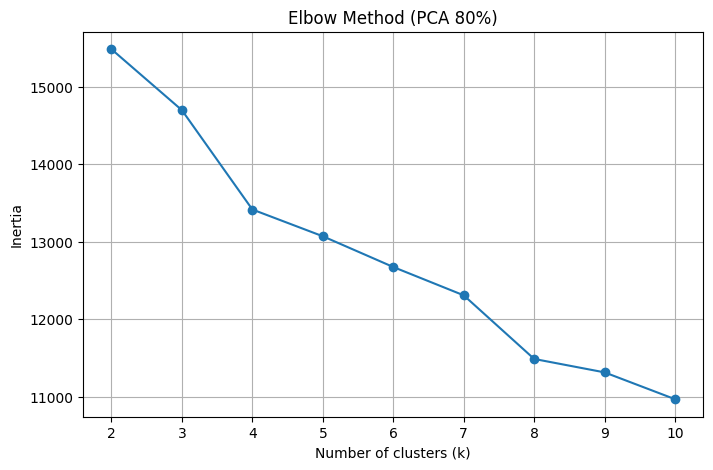

In [94]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_80)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 80%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [95]:
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


2 15481.140321526238
3 14694.647531196537
4 13412.943854024992
5 13067.795535461351
6 12671.042083078199
7 12305.652466023896
8 11484.74525256134
9 11311.44463513241
10 10965.230508802037
2 → 3 drop: 786.4927903297012
3 → 4 drop: 1281.7036771715448
4 → 5 drop: 345.1483185636407
5 → 6 drop: 396.75345238315276
6 → 7 drop: 365.389617054303
7 → 8 drop: 820.9072134625549
8 → 9 drop: 173.30061742893122
9 → 10 drop: 346.2141263303729


3->4 is the biggest drop on pca_80 => k=4

In [96]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_80)
np.bincount(labels)

array([ 551, 1030,  562,  779])

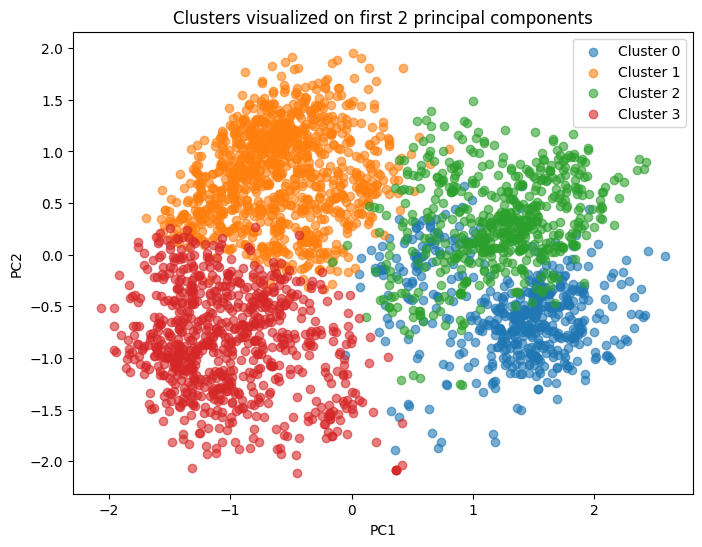

In [97]:
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_80[labels==cluster, 0], 
        X_pca_80[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


In [98]:
score = silhouette_score(X_pca_80, labels)
print("Silhouette score:", score)


Silhouette score: 0.12172498583218638


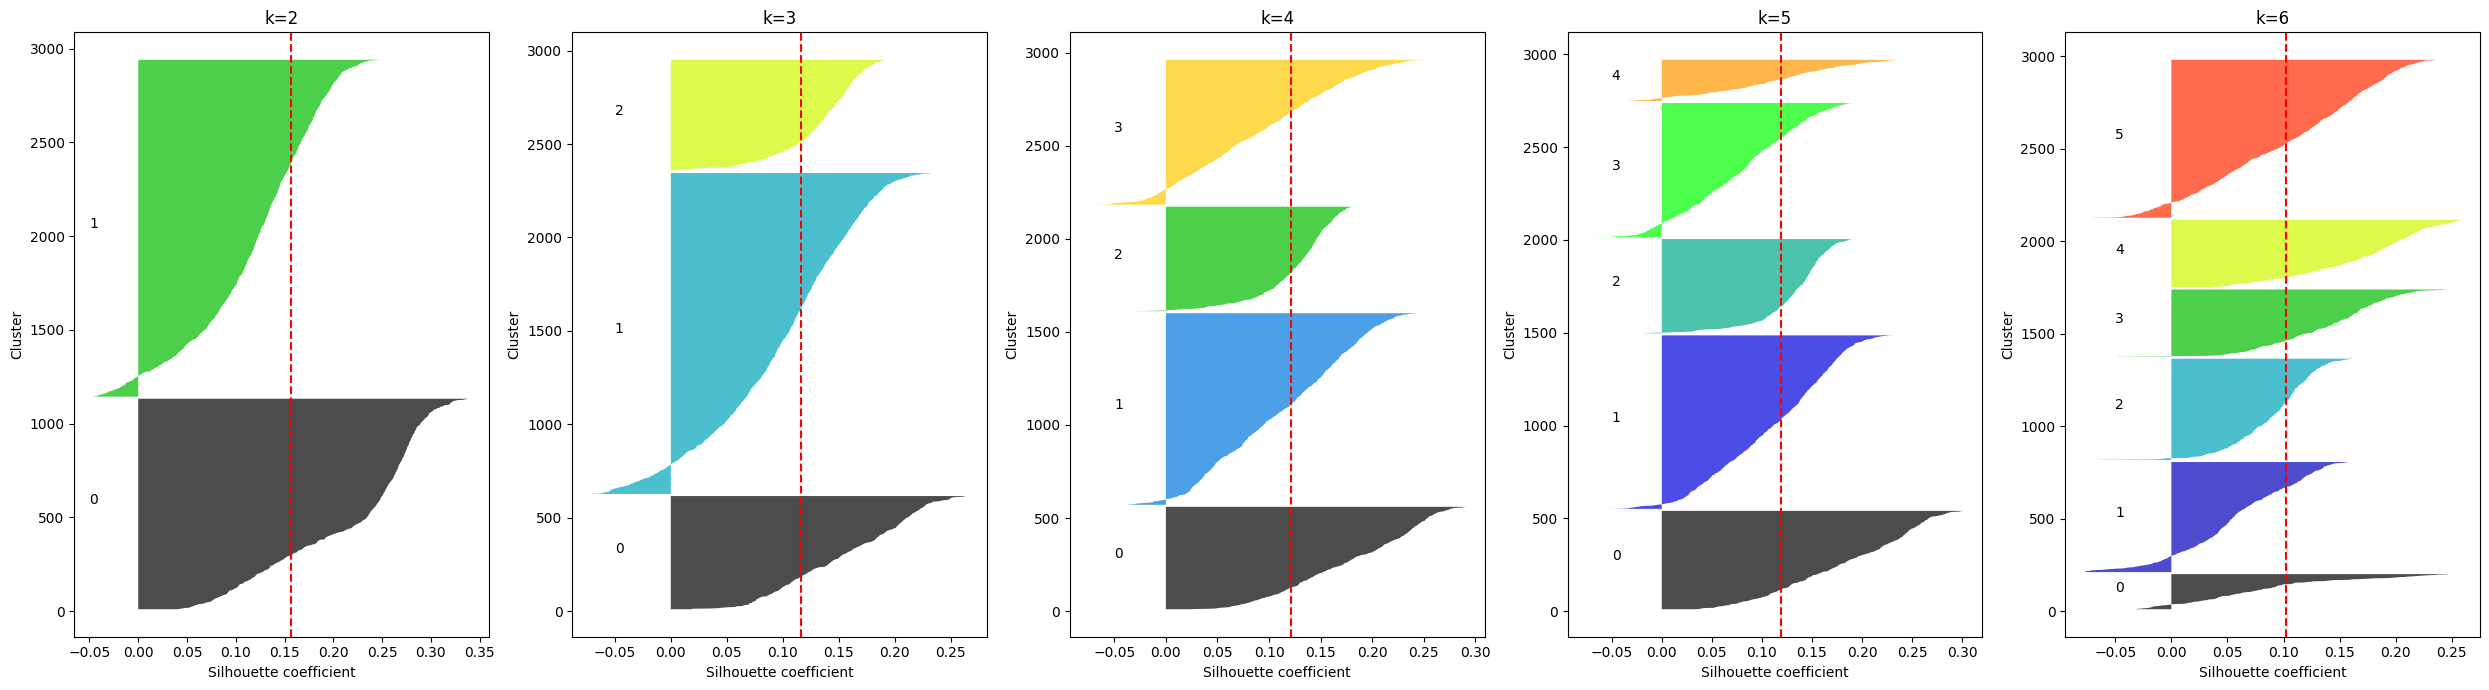

In [99]:
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_80)
    
    silhouette_vals = silhouette_samples(X_pca_80, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [100]:
loadings = pca_n_80.components_.T * np.sqrt(pca_n_80.explained_variance_)

In [101]:
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=num_cols 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
MS SubClass,-0.004299,-0.097803,-0.069014,-0.025881,-0.067760,-0.020960,0.051785,0.048012,-0.013229,-0.025796,...,-0.003995,-0.006493,-0.012914,-0.033103,-0.033554,0.103080,0.014974,0.050949,0.067483,0.003494
Lot Frontage,0.016639,0.021934,-0.006194,-0.003675,0.015916,-0.001815,-0.011245,-0.010448,0.005816,-0.001998,...,-0.001124,-0.004812,0.006964,0.001710,-0.002264,-0.021554,-0.006822,-0.002115,0.006477,0.002473
Lot Area,0.003613,0.008258,-0.004451,-0.002436,0.006045,0.000042,-0.006225,-0.000364,0.000609,-0.001813,...,-0.001883,-0.004413,0.004904,-0.000526,0.001179,-0.005962,-0.002885,-0.000188,0.001841,-0.000468
Street,0.004574,0.000518,-0.002193,0.001795,-0.000698,0.001059,0.000458,-0.001330,0.001330,0.003128,...,0.000683,0.002907,-0.004047,-0.000986,0.000315,-0.002330,0.002130,0.000937,-0.001079,0.000141
Lot Shape,-0.156597,-0.125572,0.118351,-0.001627,-0.023502,0.001730,0.210490,-0.063639,0.167985,0.022677,...,0.103769,-0.042703,0.073136,-0.060100,0.030885,0.001085,-0.024220,-0.014141,-0.000013,-0.011424


In [102]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)


House Style_1Story    0.310778
Garage Type_Attchd    0.285376
MS Zoning_RL          0.240814
House Style_2Story    0.231947
Foundation_CBlock     0.226034
Garage Type_Detchd    0.196857
MS Zoning_RM          0.179969
BsmtFin Type 1        0.155067
Roof Style_Hip        0.146050
Roof Style_Gable      0.144582
Name: PC2, dtype: float64

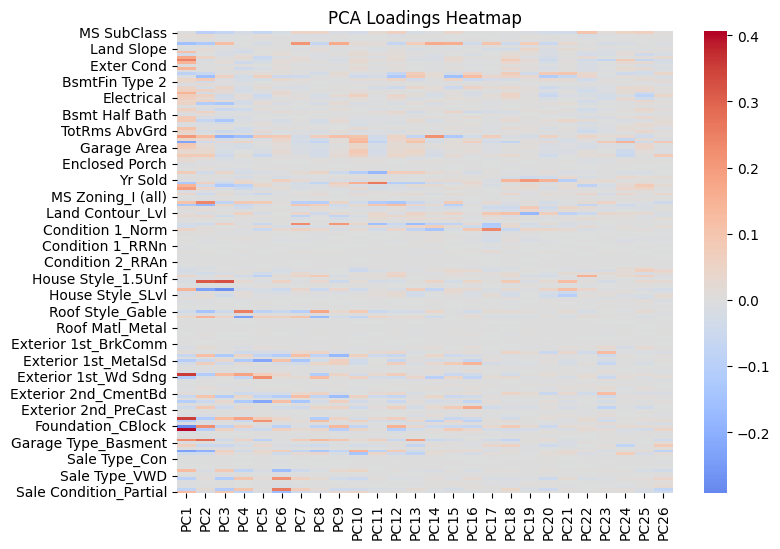

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

**Elbow, silhouette, scatter for 90%**

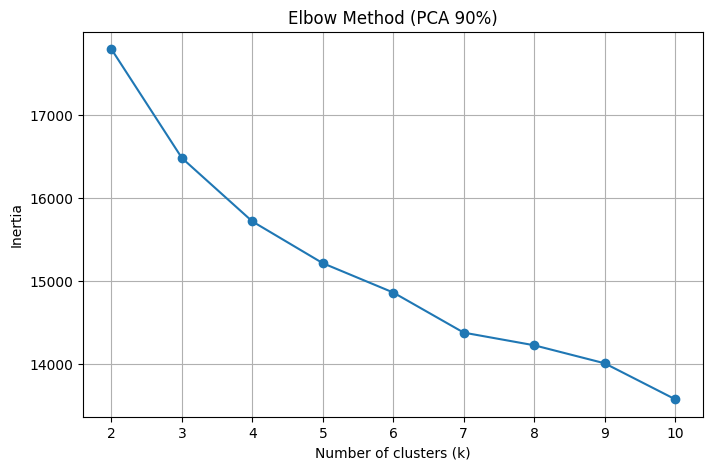

2 17786.392807781194
3 16476.35809188544
4 15713.199339271323
5 15210.407106299352
6 14857.364752911271
7 14374.86110653034
8 14222.548432112675
9 14005.663989086388
10 13573.142189321865
2 → 3 drop: 1310.0347158957557
3 → 4 drop: 763.1587526141157
4 → 5 drop: 502.7922329719713
5 → 6 drop: 353.0423533880803
6 → 7 drop: 482.50364638093197
7 → 8 drop: 152.3126744176643
8 → 9 drop: 216.88444302628704
9 → 10 drop: 432.52179976452317


In [104]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_90)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 90%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


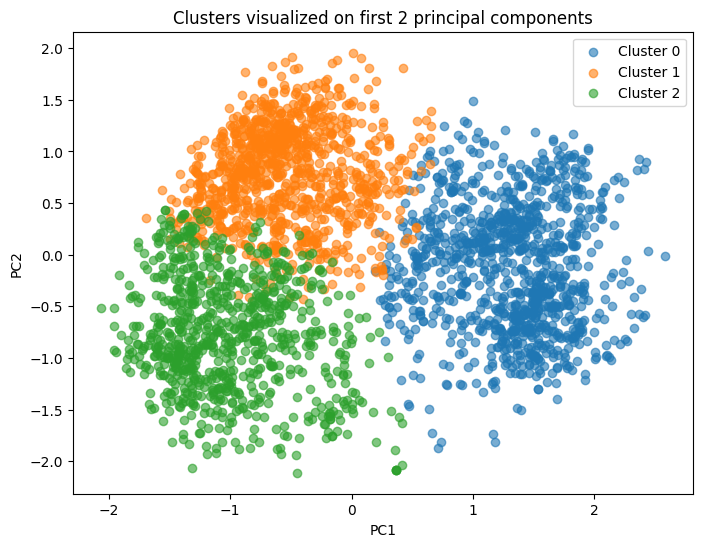

In [105]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_90)
np.bincount(labels)
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_90[labels==cluster, 0], 
        X_pca_90[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


Silhouette score: 0.12780094079031906


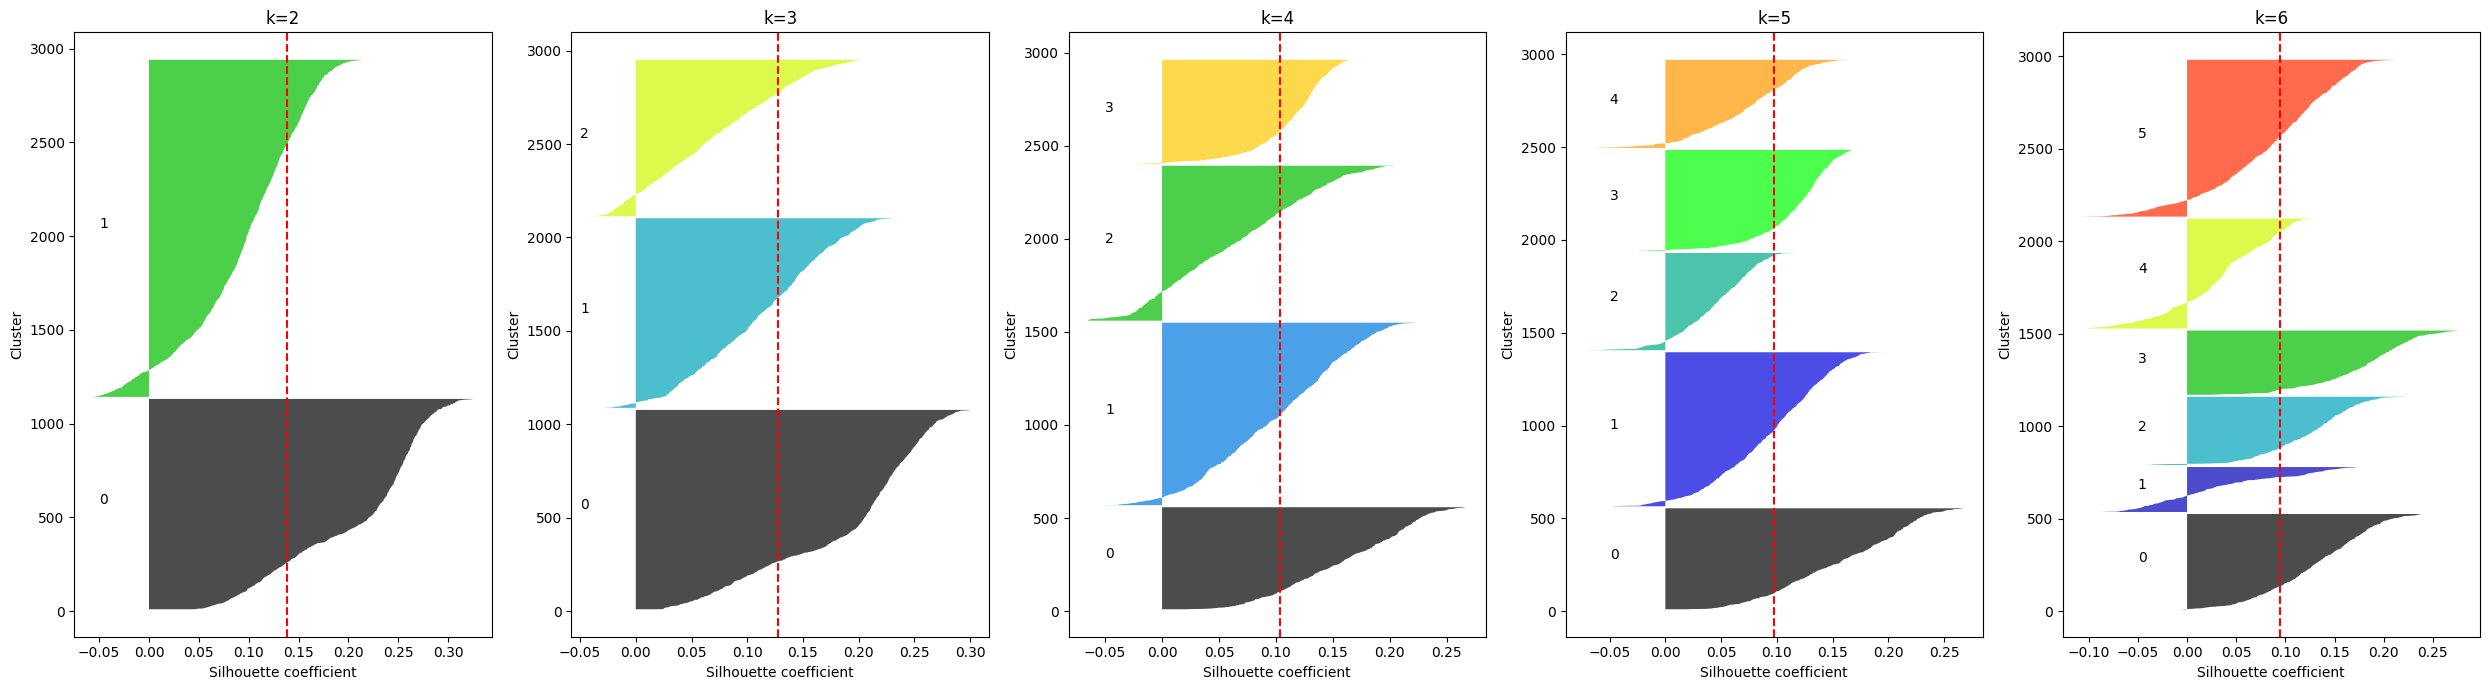

In [106]:
score = silhouette_score(X_pca_90, labels)
print("Silhouette score:", score)
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_90)
    
    silhouette_vals = silhouette_samples(X_pca_90, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [107]:
loadings = pca_n_90.components_.T * np.sqrt(pca_n_90.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=num_cols 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
MS SubClass,-0.004299,-0.097803,-0.069014,-0.025881,-0.067760,-0.020960,0.051785,0.048012,-0.013229,-0.025796,...,0.018951,0.014844,0.054222,-0.008434,0.000592,-0.001279,-0.000990,0.022438,0.001992,-0.021765
Lot Frontage,0.016639,0.021934,-0.006194,-0.003675,0.015916,-0.001815,-0.011245,-0.010448,0.005816,-0.001998,...,-0.009485,0.003968,-0.007906,0.001200,0.005560,0.003605,0.001942,-0.001225,-0.006581,-0.000873
Lot Area,0.003613,0.008258,-0.004451,-0.002436,0.006045,0.000042,-0.006225,-0.000364,0.000609,-0.001813,...,-0.002096,0.000725,0.001371,0.001436,0.001885,0.003779,0.003787,0.001198,0.001843,-0.000675
Street,0.004574,0.000518,-0.002193,0.001795,-0.000698,0.001059,0.000458,-0.001330,0.001330,0.003128,...,0.003030,-0.005630,-0.000354,-0.001405,-0.001852,-0.001287,-0.000128,-0.000354,0.002246,0.002022
Lot Shape,-0.156597,-0.125572,0.118351,-0.001627,-0.023502,0.001730,0.210490,-0.063639,0.167985,0.022677,...,0.005927,-0.006078,-0.008294,-0.001228,-0.001518,-0.004751,-0.000014,-0.003420,0.000378,0.003260


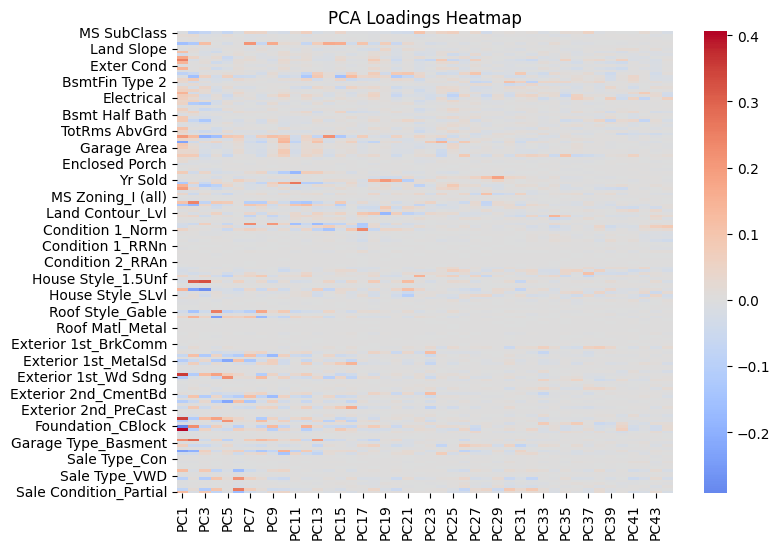

In [108]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

**Elbow, silhouette, scatter for 95%**

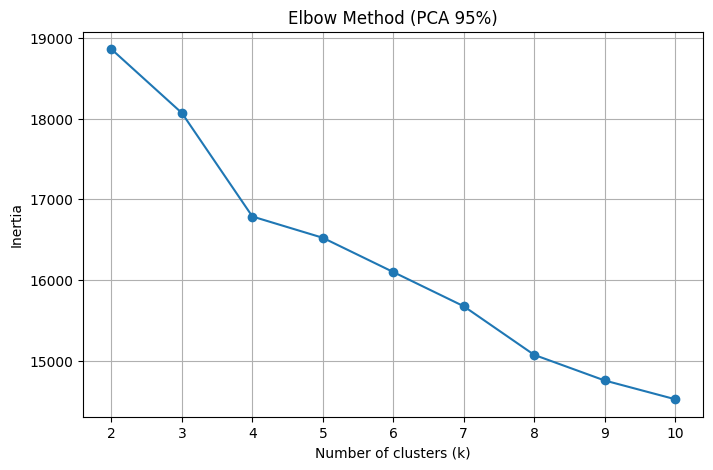

2 18860.152681836335
3 18068.786571599805
4 16785.74974194624
5 16521.58903276288
6 16096.964199292881
7 15672.94218860748
8 15069.918645700775
9 14752.28933793554
10 14519.855661405036
2 → 3 drop: 791.3661102365295
3 → 4 drop: 1283.0368296535635
4 → 5 drop: 264.1607091833612
5 → 6 drop: 424.62483346999943
6 → 7 drop: 424.02201068540126
7 → 8 drop: 603.0235429067052
8 → 9 drop: 317.62930776523535
9 → 10 drop: 232.43367653050336


In [109]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_95)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 95%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


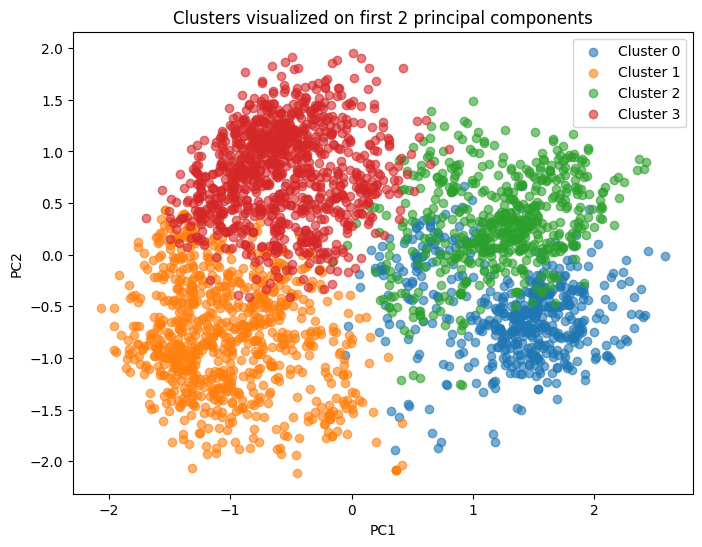

In [110]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_95)
np.bincount(labels)
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_95[labels==cluster, 0], 
        X_pca_95[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


Silhouette score: 0.09668766244421748


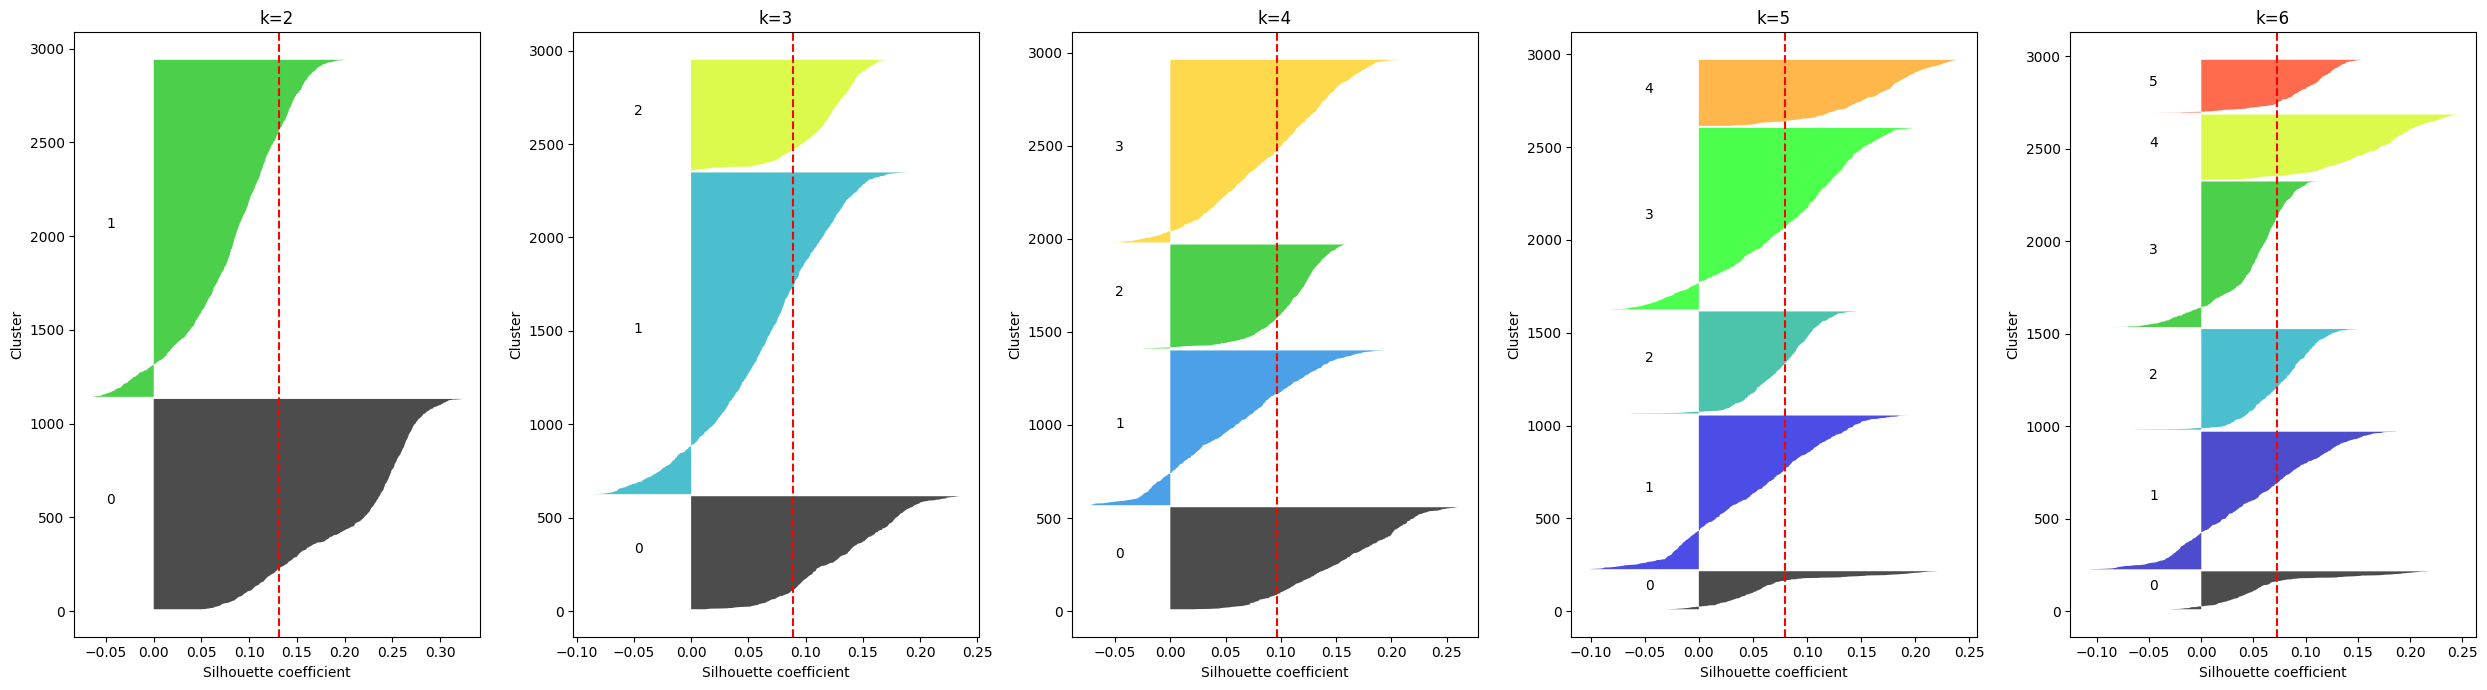

In [111]:
score = silhouette_score(X_pca_95, labels)
print("Silhouette score:", score)
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_95)
    
    silhouette_vals = silhouette_samples(X_pca_95, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [112]:
loadings = pca_n_95.components_.T * np.sqrt(pca_n_95.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=num_cols 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
MS SubClass,-0.004299,-0.097803,-0.069014,-0.025881,-0.067760,-0.020960,0.051785,0.048012,-0.013229,-0.025796,...,-0.004521,-0.013184,0.005432,0.004939,-0.003082,-0.000758,0.003765,-0.000681,-0.004889,0.008416
Lot Frontage,0.016639,0.021934,-0.006194,-0.003675,0.015916,-0.001815,-0.011245,-0.010448,0.005816,-0.001998,...,-0.008994,0.005719,0.005932,0.010145,-0.002960,-0.004639,0.002645,0.002976,-0.004195,0.000117
Lot Area,0.003613,0.008258,-0.004451,-0.002436,0.006045,0.000042,-0.006225,-0.000364,0.000609,-0.001813,...,0.002016,0.001167,0.000537,0.003286,0.000151,-0.003886,0.001743,-0.000749,-0.000516,-0.000246
Street,0.004574,0.000518,-0.002193,0.001795,-0.000698,0.001059,0.000458,-0.001330,0.001330,0.003128,...,0.002476,-0.002225,-0.000832,-0.002092,0.005419,-0.002118,0.000590,-0.004084,-0.000066,0.003287
Lot Shape,-0.156597,-0.125572,0.118351,-0.001627,-0.023502,0.001730,0.210490,-0.063639,0.167985,0.022677,...,0.001590,0.002395,0.001308,0.001688,-0.000091,-0.000080,0.002434,-0.000157,0.002392,0.000855


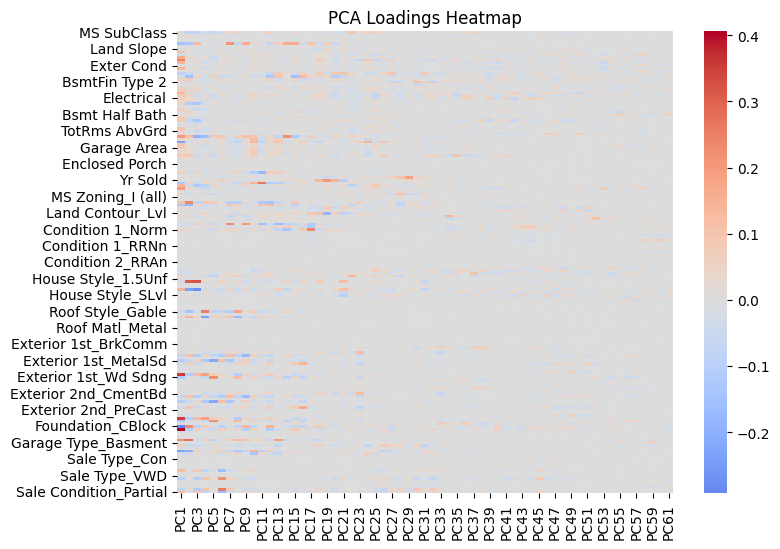

In [113]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()